In [1]:
import matplotlib.pyplot as plt
import re
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.cluster import KMeans

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random 

data = pd.read_csv("obamaprocessed.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data

,text,date_year,week_year,date_month,modded_text,modded1,noTags_punct,modded1_stemmed
0,RT @CDC_eHealth: New CDC widget - Tips for pre...,2009,18,5,rt @cdc_ehealth: new cdc widget - tips for pre...,rt cdc_ehealth new cdc widget tips preventing ...,rt cdc_ehealth new cdc widget tips for preven...,rt cdc_ehealth new cdc widget tip preve...
1,RT @DHSJournal: Press Briefing VIDEO: Homeland...,2009,18,5,rt @dhsjournal: press briefing video: homeland...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press briefing video homeland se...,rt dhsjournal press brief video homeland...
2,RT @CDC_eHealth Add a graphic with flu prevent...,2009,18,5,rt @cdc_ehealth add a graphic with flu prevent...,rt add graphic flu prevention messages webpage...,rt add a graphic with flu prevention message...,rt add graphic flu prevent messag webpa...
3,The President's Remarks on Justice Souter: The...,2009,18,5,the president's remarks on justice souter: the...,presidents remarks justice souter president ma...,the presidents remarks on justice souter the p...,presid remark justic souter presid made ...
4,WhiteHouse 2.0: Today the White House is takin...,2009,18,5,whitehouse 2.0: today the white house is takin...,whitehouse 20 today white house taking steps e...,whitehouse 20 today the white house is taking ...,whitehous 20 today white hous take step...
5,Shooting Around With the Huskies: The Presiden...,2009,18,5,shooting around with the huskies: the presiden...,shooting around huskies president shot hoops u...,shooting around with the huskies the president...,shoot around huski presid shot hoop und...
6,RT @CDC_eHealth Check out CDC's new webpage hi...,2009,18,5,rt @cdc_ehealth check out cdc's new webpage hi...,rt check cdcs new webpage highlighting several...,rt check out cdcs new webpage highlighting s...,rt check cdc new webpag highlight sever...
7,Check out the CDC website (www.cdc.gov) or @CD...,2009,18,5,check out the cdc website (www.cdc.gov) or @cd...,check cdc website wwwcdcgov learn h1n1 flu swi...,check out the cdc website wwwcdcgov or to le...,check cdc websit wwwcdcgov learn h1n1 f...
8,Welcome to the official Twitter page for the W...,2009,18,5,welcome to the official twitter page for the w...,welcome official twitter page white house,welcome to the official twitter page for the w...,welcom offici twitter page white hous
9,“My Fellow Americans”: The President attends a...,2009,18,5,“my fellow americans”: the president attends a...,fellow americans president attends naturalizat...,my fellow americans the president attends a ...,fellow american presid attend natur cere...


11123


<function matplotlib.pyplot.show(*args, **kw)>

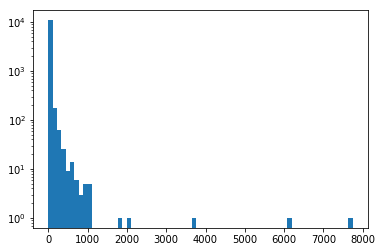

In [2]:
stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
print(len(stemmed_words))
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

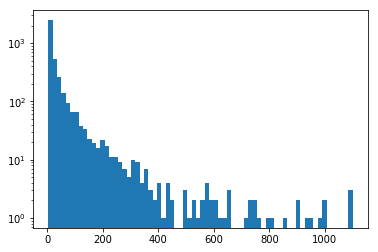

In [3]:
stemmed_words = stemmed_words[stemmed_words > 3]
stemmed_words = stemmed_words[stemmed_words < 1500]
plt.hist(stemmed_words.values,bins=70,log=True)
plt.show

In [ ]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [4]:
#don't count words
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()

#pre-campaign
data1 = data[data["date_year"] <= 2016]
data1 = data1[data1["date_year"] >= 2015]

#post campaign
#data1 = data[data["year"] >= 2017]
#sentences = data1["noTags_punct"].tolist()

#print(len(data1),len(sentences))
data1["date_year"].unique()
sentences = data1["noTags_punct"].tolist()

In [5]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['happy', 'new', 'year'], tags=[0]),
 TaggedDocument(words=['more', 'than', '26', 'million', 'new', 'jobs', '10', 'million', 'americans', 'gained', 'coverage', 'check', 'out', 'the', 'progress', 'we', 'made', 'in', '2014'], tags=[1]),
 TaggedDocument(words=['check', 'out', 'the', 'top', '10', 'white', 'house', 'series', 'from', '2014', 'as', 'determined', 'by', 'our', 'tumblr', 'followers'], tags=[2]),
 TaggedDocument(words=['watch', 'this', 'if', 'you', 'love', 'behindthescenes', 'moments', 'with', 'president', 'obama', 'and', 'the', 'vp', 'westwingweek'], tags=[3]),
 TaggedDocument(words=['student', 'filmmakers', 'submit', 'your', '3min', 'video', 'on', 'the', 'impact', 'of', 'giving', 'back', 'for', 'the', 'whfilmfest'], tags=[4]),
 TaggedDocument(words=['2014', 'in', 'review', 'president', 'obama', 'became', 'the', '1st', 'president', 'to', 'write', 'a', 'line', 'of', 'code'], tags=[5]),
 TaggedDocument(words=['presssec', 'on', 'president', 'obama', 'imposing'

In [6]:
len(tagged_data)

6555

In [7]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=500, min_count=4, epochs=100)

model.build_vocab(tagged_data)


In [8]:
%%time 
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 1min 20s, sys: 6.56 s, total: 1min 27s
Wall time: 40.1 s


In [9]:
%%time
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]

X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

CPU times: user 44 s, sys: 24.2 ms, total: 44 s
Wall time: 44 s


In [10]:
%%time
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

CPU times: user 34min 35s, sys: 1h 17min 39s, total: 1h 52min 15s
Wall time: 4min 41s


In [11]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({1: 98,
         0: 6433,
         9: 1,
         3: 4,
         2: 10,
         20: 1,
         19: 1,
         5: 2,
         3282: 1,
         4: 1,
         31: 1,
         6200: 1,
         6475: 1})

In [12]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (6554): «nothing can break the spirit of the greek people you will overcome this period of challenge potus in athens»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d500,n5,w5,mc4,s0.001,t3):

MOST (6554, 0.9202115535736084): «nothing can break the spirit of the greek people you will overcome this period of challenge potus in athens»

SECOND-MOST (6482, 0.470344603061676): «whenever the world makes you cynical whenever you seek true humility and selflessness look to a veteran potus»

MEDIAN (6245, 0.19453571736812592): «what innovations will shape americas future potus explores the possibilities at todays whfrontiers conference»

LEAST (6049, -0.14573034644126892): «meet 4 parents who are fighting to bring awareness to the opioid epidemic that took their children s lives»



In [13]:
doc_id = random.randint(0, len(tagged_data) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_data[sim_id[0]].words)))


Train Document (964): «watch president obama speak on how the affordable care act is benefiting millions of americans betterwithobamacare»

Similar Document (1263, 0.7081826329231262): «watch president obama speak on the situation in baltimore»



# hierachical


from sklearn.cluster import AgglomerativeClustering

#average 
#2 0.20235462
#3 0.17323813
#4 0.15857914
#5 0.15378755
#6 0.078243
#7 0.051599164
#8 0.036651324
#9 0.028211854


for c in range(2,10):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=c)
    clustering.fit(X)
    labels = clustering.labels_
    d = silhouette_score(X, labels,metric='cosine')
    print(c,d)

clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=6)
clustering.fit(X)
assigned_clusters = clustering.labels_
d = silhouette_score(X, assigned_clusters,metric='cosine')

print(d)
NUM_CLUSTERS = 5

# kmeans

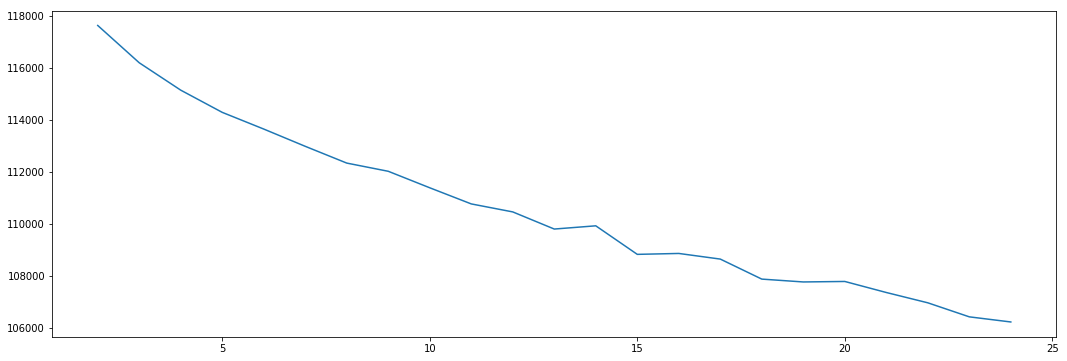

CPU times: user 9min 20s, sys: 9min 47s, total: 19min 8s
Wall time: 3min 24s


In [17]:
%%time

#solo per aveere un'idea di quanti cluster
sse_list = list()
max_k = 25
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [18]:
%%time


NUM_CLUSTERS = 10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)
#0.032

0.03211227
CPU times: user 26min 15s, sys: 1.86 s, total: 26min 17s
Wall time: 26min 12s


In [19]:
datak = data1
datak["labels"] = assigned_clusters

In [20]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    print(len(c))
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

1389
Cluster 0 dimension 1389
537
Cluster 1 dimension 537
633
Cluster 2 dimension 633
686
Cluster 3 dimension 686
971
Cluster 4 dimension 971
257
Cluster 5 dimension 257
324
Cluster 6 dimension 324
605
Cluster 7 dimension 605
507
Cluster 8 dimension 507
646
Cluster 9 dimension 646


In [21]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 potus           434
watch           218
president       132
actonclimate    114
today           112
us               98
live             91
obama            89
americans        86
american         82
dtype: int64
cluster  1 potus        259
time          56
obama         47
women         38
us            36
today         36
americans     34
president     33
america       32
people        32
dtype: int64
cluster  2 potus        378
america       77
us            64
obama         58
watch         54
years         42
president     40
every         40
today         36
americans     33
dtype: int64
cluster  3 potus           429
watch            59
obama            57
people           53
president        53
us               52
every            42
american         37
actonclimate     35
america          35
dtype: int64
cluster  4 potus        880
people        83
us            64
one           63
american      62
americans     60
america       54
today         49
watch         47


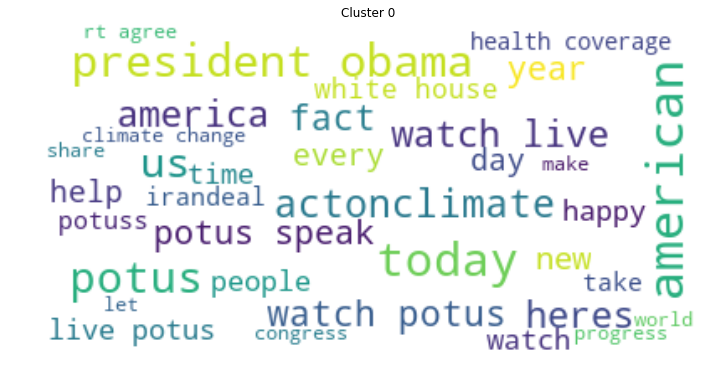

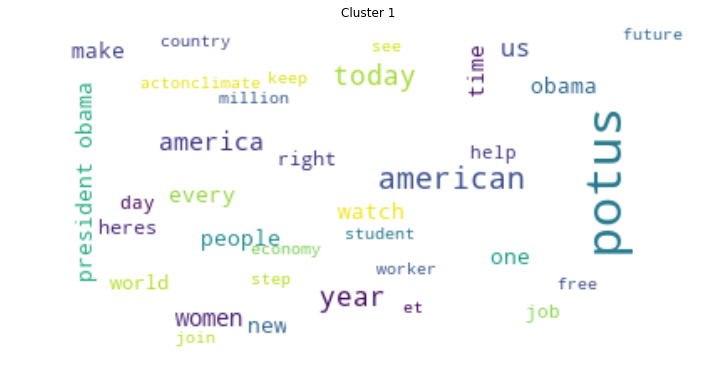

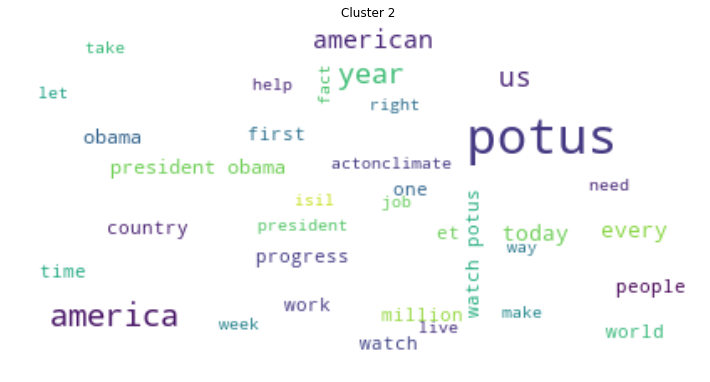

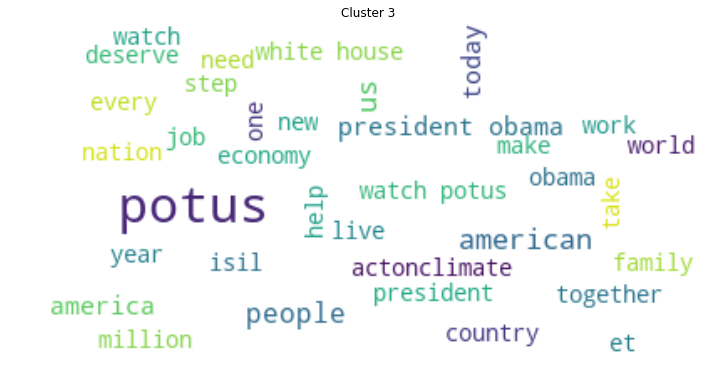

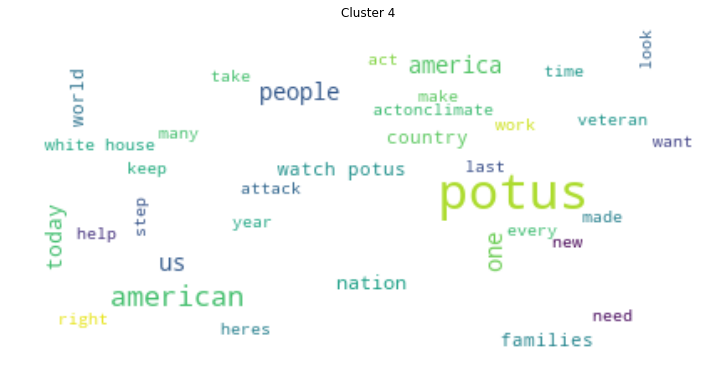

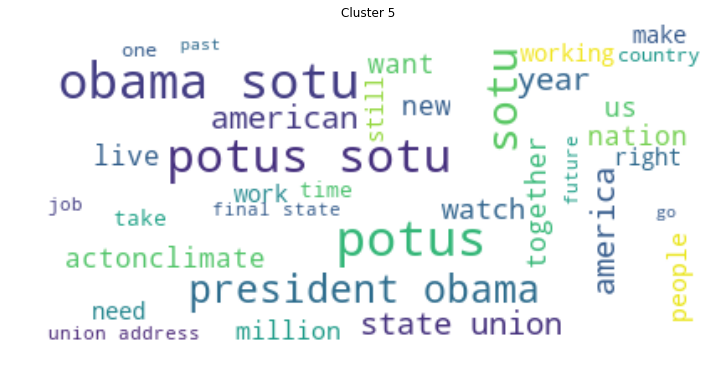

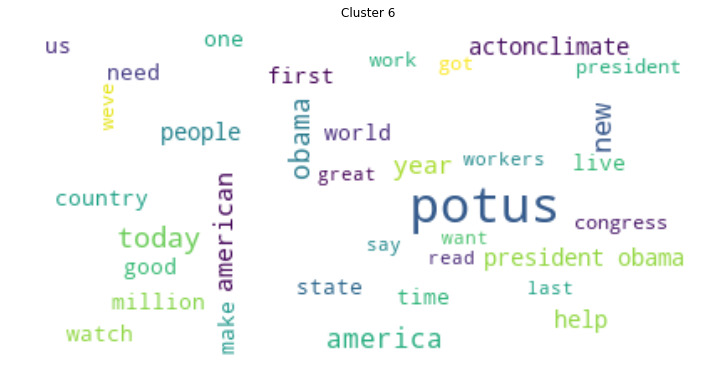

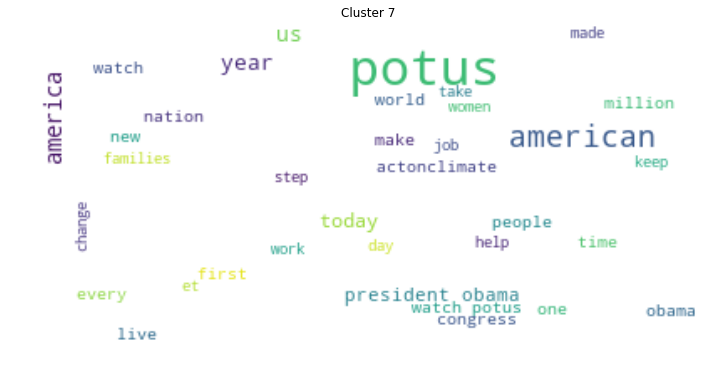

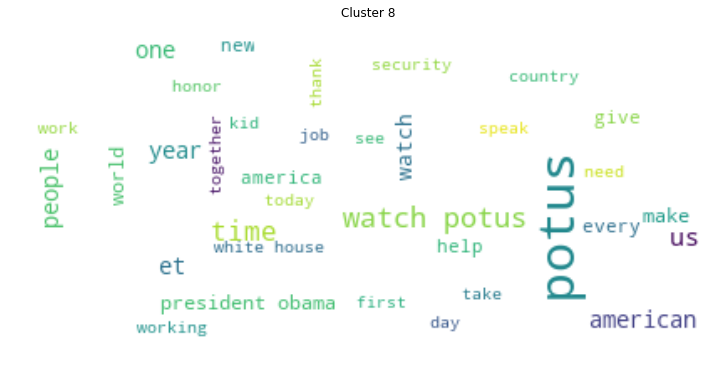

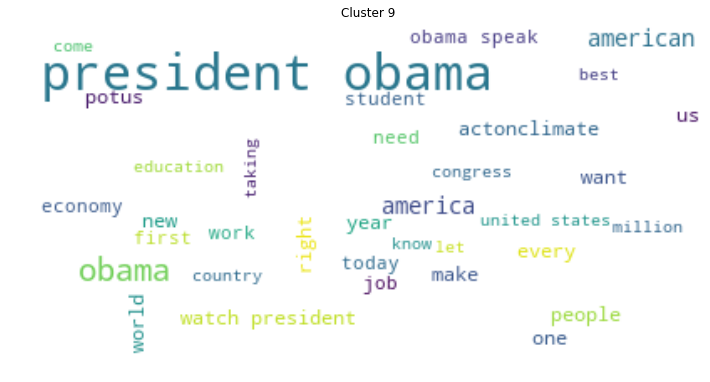

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    print
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
#trova un modo di clusterizzare le cose assieme ai dati / sentiment analysis

In [24]:
datak.to_csv("Obama1516Clustered.csv")